### Project: Coffee sales Performance Analysis

The objective of this analysis is to check the financial health of a coffee brand that has 3 physical stores and look for where optimization are needed for maximum profit from business settings. In this analysis we walk through what are the top performing stores, product and categories, check if low price does lead to increase in quantity or sales etc.... And at the end of the analysis, recommendations will be provided based analysis outcomes on business objectives (bisuness questions).

#### Data Dictionary:

This dataset is from kaggle.com between a 6 months period (Jan - June 2023), it contains 11 columns(but will be reduce to columns needed to aid analysis performance) and approximately 150k records, due to this amount of data present we can assume that whatever the result of our analysis is, it can be use or aid in decision making for stakeholder(s).

**Columns present**:

- (Remove)
Store Id,
Product Id,
Product Details

- (Need)
Transaction Date,
Transaction Time,
Transaction Qty,
Store Location,
Unit Price,
Product Category,
Product Type

7 columns are needed for our analysis




#### Importing libraries, data and cleaning

In [2]:
# importing analysis and visualization packages/libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing coffee dataset and assigning it to a dataframe object

coffee_sales = pd.read_excel(r"C:\\Users\\BJ\\Desktop\\Dataset\\Excel\\coffee_sales.xlsx")
df_coffee = coffee_sales.copy()

#### Exploration and data cleaning

In [4]:
# Checking columns information (data typpes.. etc) and records count

df_coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


The dataset contains complete records (no null values) and accurate data types 

In [5]:
# checking top 5 rows
df_coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
# Checking last 5 rows

df_coffee.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [7]:
# Checking and cleaning duplicate records

df_coffee.duplicated().sum()

0

In [8]:
# Dropping columns not neccesary for analysis

df_coffee.drop(columns=['store_id', 'product_id', 'product_detail'], axis=0, inplace=True )

In [9]:
# Checking dataset headers after dropping columns

df_coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea


Dataset show "0" duplicate entries, for this our result won't be skew as not to arrive or make wrong conclusion(s)

### Analysis and Insights (Business Questions Or Scope of Work)
From this stage we will focus on analyzing the data, extracting KPIs and Charts for easy assimilation of results

In [10]:
# Creating calculated field (sales column)

df_coffee['sale'] = df_coffee['transaction_qty'] * df_coffee['unit_price']

In [11]:
# What is the total sales, quantity, Avg spent per order

print("The Total Sales across all 3 stores is $", (df_coffee['sale'].sum().round(2)))
print("Quantity sold is ", (df_coffee['transaction_qty'].sum()))
print("And the Avg Order Value is $",(df_coffee['sale'].sum() / df_coffee['transaction_id'].nunique()).round(2))

The Total Sales across all 3 stores is $ 698812.33
Quantity sold is  214470
And the Avg Order Value is $ 4.69


In [12]:
# What is the sales, quantity, and AOV in individual stores

df_coffee_stores = df_coffee.groupby('store_location').agg({
    'sale': 'sum',
    'transaction_qty':'sum',
    'transaction_id': lambda x:x.nunique()
    }
)

# Adding AOV column
df_coffee_stores['Aov'] = (df_coffee_stores['sale'].divide(df_coffee_stores['transaction_id'])).round(2)

#renaming columns
df_coffee_stores.rename(columns={'sale': 'Total_Sale', 'transaction_qty': 'Transaction_Quantity', 'transaction_id': 'Unique_Order_count'}, inplace=True)

df_coffee_stores

,Total_Sale,Transaction_Quantity,Unique_Order_count,Aov
store_location,,,,
Astoria,232243.91,70991,50599,4.59
Hell's Kitchen,236511.17,71737,50735,4.66
Lower Manhattan,230057.25,71742,47782,4.81


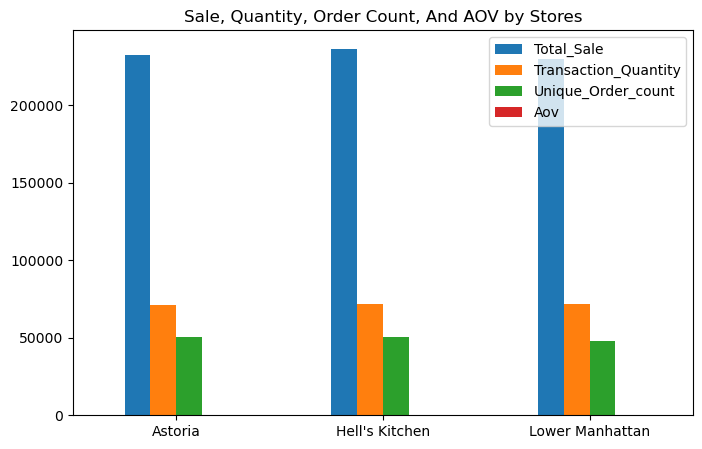

In [13]:
# plotting columns chart of Metrics among the 3 stores
df_coffee_stores.plot(kind='bar', figsize=(8, 5))
plt.title("Sale, Quantity, Order Count, And AOV by Stores")
plt.xticks(rotation=360)
plt.xlabel("")
plt.show()

In [14]:
# code to Show all rows (records)
pd.set_option('display.max_rows', None)

There's not much difference in Sales, Quantity, and AOV among the 3 stores

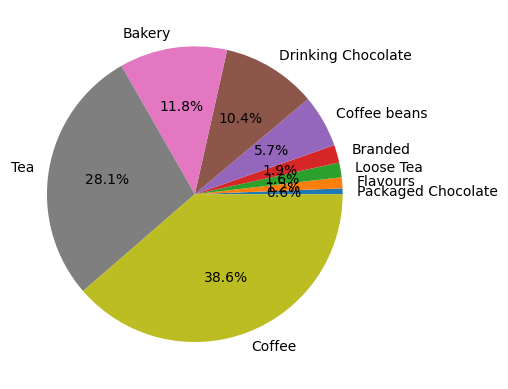

In [ ]:
# Which category or categories  contribute the most to the overall revenue

category_revenue = df_coffee.groupby('product_category')['sale'].sum()
category_revenue.sort_values(ascending=True, inplace=True)

plt.pie(x=category_revenue.values, labels=category_revenue.index, autopct='%1.1f%%')

plt.show()

The Coffee Category (38.6%) and Tea (28.1) category contribute to the overall sales

In [15]:
# Which products are the top selling product by revenue and quantity in each store

df_coffee_product = df_coffee.groupby(['store_location','product_type'])['transaction_qty'].sum().reset_index()
df_coffee_product.sort_values(by=['store_location','transaction_qty'], ascending=[True, False], inplace=True)

# Top selling Product in each store
df_coffee_product[df_coffee_product['transaction_qty'] > 7000]

,store_location,product_type,transaction_qty
4,Astoria,Brewed Chai tea,9306
13,Astoria,Gourmet brewed coffee,8938
0,Astoria,Barista Espresso,7345
29,Hell's Kitchen,Barista Espresso,9064
33,Hell's Kitchen,Brewed Chai tea,8755
42,Hell's Kitchen,Gourmet brewed coffee,8472
71,Lower Manhattan,Gourmet brewed coffee,8563
58,Lower Manhattan,Barista Espresso,8534
62,Lower Manhattan,Brewed Chai tea,8189


Among the 3 stores, **Brewed Chai tea** sold the most, and in Hell's Kitchen, **Barista Espresso** sold the most. While in Lower Manhattan **Gourmet Brewed Coffee** Sold the Most. Despite different stores having different top product there's consistency among the 3 top products been sold in each store location with slight margin among them. The 3 top product sold could likely be because they are low price product. 

In [16]:
# Checking average unit price of each product to verify if low unitprice leads to increase in quantity sold

product_avg_unit_price = df_coffee.groupby('product_type', as_index=False).agg({'transaction_qty': 'sum', 'unit_price': 'mean'})

top_3_product = ['Brewed Chai tea', 'Gourmet brewed coffee', 'Barista Espresso']

top_3_product = product_avg_unit_price[product_avg_unit_price['product_type'].isin(top_3_product)]

top_3_product

,product_type,transaction_qty,unit_price
0,Barista Espresso,24943,3.655200
4,Brewed Chai tea,26250,2.936993
13,Gourmet brewed coffee,25973,2.696641


Yes, low selling price and customers preferences leads to increase in sales of the 3 top products in each store

                 unit_price  transaction_qty
unit_price         1.000000        -0.123546
transaction_qty   -0.123546         1.000000


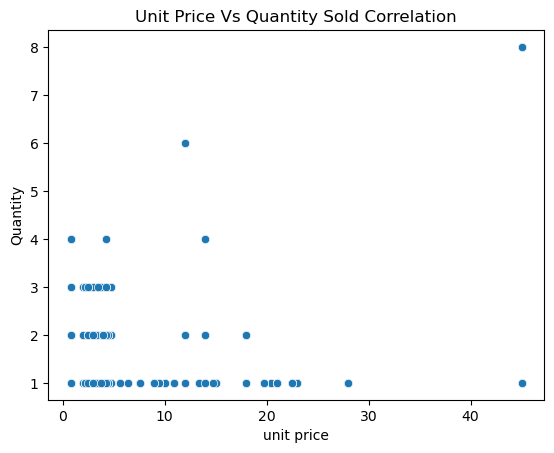

In [17]:
# Checking if low price only leads to increase in sales using "Pearson Correlation Test" (Correlation Matrix) and Scatter Plot to visualize 
print(df_coffee[['unit_price', 'transaction_qty']].corr(method='pearson'))

sns.scatterplot(data=df_coffee, x='unit_price', y='transaction_qty')
plt.title("Unit Price Vs Quantity Sold Correlation")
plt.xlabel("unit price")
plt.ylabel("Quantity")
plt.show()

There's no relationship between low price and quantity purchase in a **single transaction**, but there's a relationship between low selling product and the overall quantity in the sale table

In [18]:
#What are the Top 5 slow moving products

df_coffee_slow_moving_product = df_coffee.groupby('product_type', as_index= False).agg({'transaction_qty': 'sum', 'unit_price': 'mean'})
bottom_5 = df_coffee_slow_moving_product.sort_values(by='transaction_qty', ascending=True).head(5)
bottom_5

,product_type,transaction_qty,unit_price
14,Green beans,134,10.000000
15,Green tea,159,9.250000
18,House blend Beans,183,18.000000
21,Organic Chocolate,221,7.600000
8,Clothing,221,27.886878


They are slow movers due to been slightly expensive than other products

In [19]:
# Top 3 and bottom 3 in terms of quantity sold and unit price comparison
df_top__bottom_products = pd.concat([top_3_product, bottom_5])
df_top__bottom_products.set_index('product_type', inplace=True)
df_top__bottom_products.sort_values(by='unit_price', ascending=True, inplace=True)
df_top__bottom_products

,transaction_qty,unit_price
product_type,,
Gourmet brewed coffee,25973,2.696641
Brewed Chai tea,26250,2.936993
Barista Espresso,24943,3.655200
Organic Chocolate,221,7.600000
Green tea,159,9.250000
Green beans,134,10.000000
House blend Beans,183,18.000000
Clothing,221,27.886878


Low unit price is the cause of increase in quantity sold in overall table (prefernces can also differ)

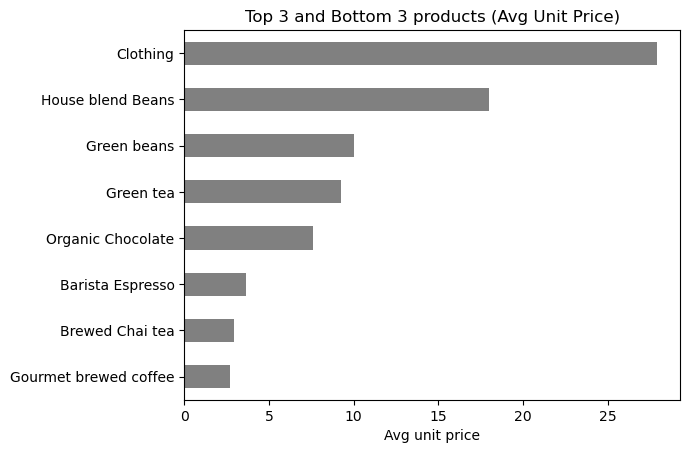

In [20]:
df_top__bottom_products['unit_price'].plot(kind='barh', color="grey")
plt.title('Top 3 and Bottom 3 products (Avg Unit Price)')
plt.ylabel("")
plt.xlabel("Avg unit price")
plt.show()

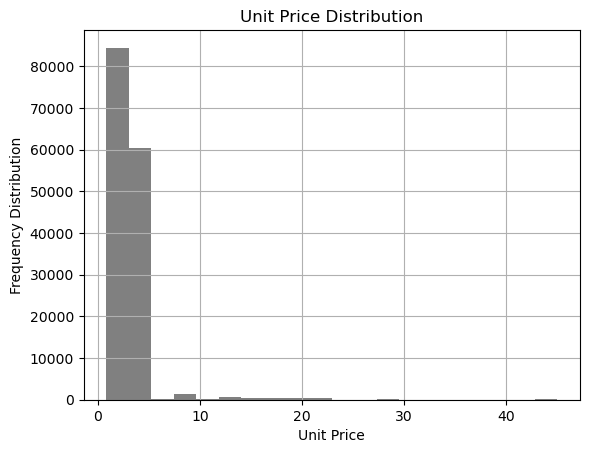

In [21]:
# How is the unit price distributed

df_coffee['unit_price'].hist(bins=20, color="grey")
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.ylabel("Frequency Distribution")
plt.show()

The distribution is **right skewed** meaning low price products sell the most

In [22]:
df_coffee.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,sale
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,6.0
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,9.0
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,2.0
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2


     product_category       sale  percentage
2              Coffee  269952.45   38.630178
8                 Tea  196405.95   28.105679
0              Bakery   82315.64   11.779363
4  Drinking Chocolate   72416.00   10.362725
3        Coffee beans   40085.25    5.736197
1             Branded   13607.00    1.947161
6           Loose Tea   11213.60    1.604665
5            Flavours    8408.80    1.203299
7  Packaged Chocolate    4407.64    0.630733


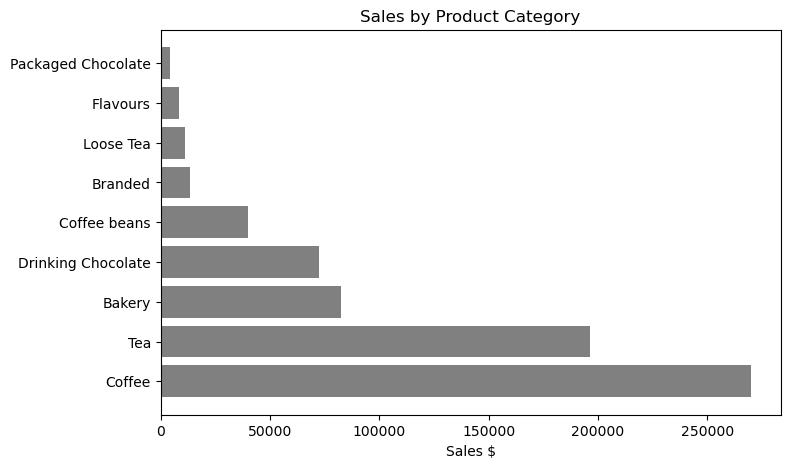

In [23]:
# Which product category gives the highest margin

category_margin = df_coffee.groupby('product_category')['sale'].sum().reset_index()

category_margin['percentage'] = (category_margin['sale'] / category_margin['sale'].sum())*100

category_margin.sort_values(by='sale',ascending=False, inplace=True)

print(category_margin)

plt.figure(figsize=(8, 5))
plt.barh(y=category_margin['product_category'], width=category_margin['sale'], color="grey")
plt.xlabel('Sales $')
plt.title('Sales by Product Category')
plt.show()

The **coffee category** give the highest sales margin of **38.63%**

## Time Analysis

In [24]:
# creating time analysis dataframe
df_coffee_time_analysis = df_coffee
df_coffee_time_analysis.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,sale
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,6.0
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,9.0
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,2.0
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2


In [25]:
#merging date and time columns together for easy extraction of hour

df_coffee_time_analysis['transaction_date_time'] = pd.to_datetime(df_coffee_time_analysis['transaction_date'].astype(str) +" "+ df_coffee_time_analysis['transaction_time'].astype(str))

# Extracting (creating) Month_no, Month_name, day_name from datetime column 

df_coffee_time_analysis['hour'] = df_coffee_time_analysis['transaction_date_time'].dt.hour
df_coffee_time_analysis['month'] = df_coffee_time_analysis['transaction_date_time'].dt.month
df_coffee_time_analysis['month_name'] = df_coffee_time_analysis['transaction_date_time'].dt.month_name()
df_coffee_time_analysis['day_name'] = df_coffee_time_analysis['transaction_date_time'].dt.day_name()

# checking columns created
df_coffee_time_analysis.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,sale,transaction_date_time,hour,month,month_name,day_name
0,1,2023-01-01,07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,6.0,2023-01-01 07:06:11,7,1,January,Sunday
1,2,2023-01-01,07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2,2023-01-01 07:08:56,7,1,January,Sunday
2,3,2023-01-01,07:14:04,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,9.0,2023-01-01 07:14:04,7,1,January,Sunday
3,4,2023-01-01,07:20:24,1,Lower Manhattan,2.0,Coffee,Drip coffee,2.0,2023-01-01 07:20:24,7,1,January,Sunday
4,5,2023-01-01,07:22:41,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2,2023-01-01 07:22:41,7,1,January,Sunday


In [26]:
#dropping date and time columns

df_coffee_time_analysis.drop(columns=['transaction_time', 'transaction_date'], axis=0, inplace=True)

df_coffee_time_analysis.head()

,transaction_id,transaction_qty,store_location,unit_price,product_category,product_type,sale,transaction_date_time,hour,month,month_name,day_name
0,1,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,6.0,2023-01-01 07:06:11,7,1,January,Sunday
1,2,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2,2023-01-01 07:08:56,7,1,January,Sunday
2,3,2,Lower Manhattan,4.5,Drinking Chocolate,Hot chocolate,9.0,2023-01-01 07:14:04,7,1,January,Sunday
3,4,1,Lower Manhattan,2.0,Coffee,Drip coffee,2.0,2023-01-01 07:20:24,7,1,January,Sunday
4,5,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,6.2,2023-01-01 07:22:41,7,1,January,Sunday


In [27]:
#creating sales column 

df_coffee_time_analysis['sale'] = df_coffee_time_analysis['unit_price'] * df_coffee_time_analysis['transaction_qty']

hour
6      7811.95
7     23579.90
8     30579.85
9     31014.85
10    33297.10
11    18188.15
12    16162.90
13    16620.95
14    16725.35
15    16737.05
16    16861.55
17    16527.65
18    14241.20
19    10630.15
20      973.85
Name: sale, dtype: float64


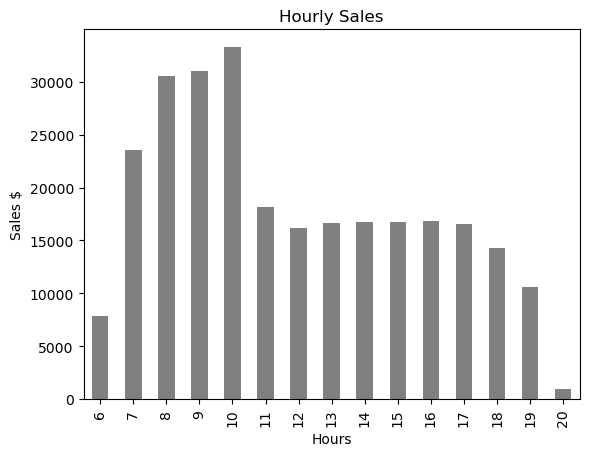

In [28]:
# What are the Peak hours for coffee sale

#filtering data to coffee category

coffee_time_sales = df_coffee_time_analysis[df_coffee_time_analysis['product_category']=='Coffee']

coffee_hour_sales = coffee_time_sales.groupby('hour')['sale'].sum()
print(coffee_hour_sales)

coffee_hour_sales.plot(kind='bar', color='grey')
plt.title('Hourly Sales')
plt.xlabel("Hours")
plt.ylabel("Sales $")
plt.show()

The peak sales hour for coffee products is between 7am and 10am

month_name
January      81677.74
February     76145.19
March        98834.68
April       118941.08
May         156727.76
June        166485.88
Name: sale, dtype: float64


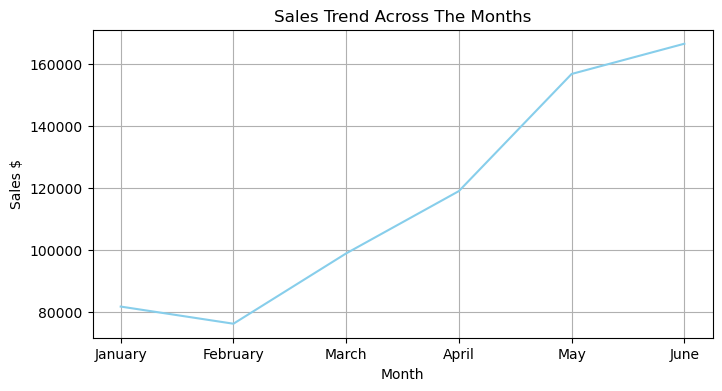

In [29]:
# How as revenue trend from month to month over the 2 Quarters

df_monthly_sales = df_coffee_time_analysis.groupby('month_name')['sale'].sum().reindex(index=['January', 'February', 'March', 'April', 'May', 'June'])
print(df_monthly_sales)

#plotting line chart

df_monthly_sales.plot(kind='line', grid=True, figsize=(8, 4), title='Sales Trend Across The Months', xlabel="Month", ylabel='Sales $', color='skyblue')
plt.show()

Sales has an upward trend with february having the least sale and june having the highest sales

In [30]:
# month over month Growth

monthly_sales_2 = df_coffee_time_analysis.groupby(pd.Grouper(key='transaction_date_time', freq='ME'))['sale'].sum()
df_mom = monthly_sales_2.pct_change()*100
df_mom = df_mom.reset_index()

#renaming columns
df_mom.columns = ['Month', "Growth_Rate"]

#average growth rate

print("The avg growth rate is :",df_mom['Growth_Rate'].mean().round(2),'%')
df_mom

The avg growth rate is : 16.27 %


,Month,Growth_Rate
0,2023-01-31,NaN
1,2023-02-28,-6.773633
2,2023-03-31,29.797667
3,2023-04-30,20.343466
4,2023-05-31,31.769242
5,2023-06-30,6.226159


day_name
Monday       101677.28
Friday       101373.00
Thursday     100767.78
Wednesday    100313.54
Tuesday       99455.94
Sunday        98330.31
Saturday      96894.48
Name: sale, dtype: float64


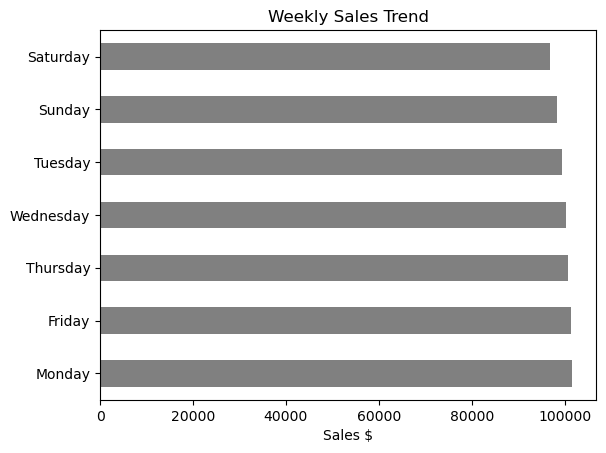

In [31]:
# Which day of the week contribute the most to sales

week_day_sale = df_coffee_time_analysis.groupby('day_name')['sale'].sum().sort_values(ascending=False)
print(week_day_sale)

week_day_sale.plot(kind='barh', color=['grey'])
plt.ylabel('')
plt.xlabel('Sales $')
plt.title('Weekly Sales Trend')
plt.show()

There is almost no variation between the weekly sales, and Weekdays make more sales than weekend only by slight margin (almost no difference)

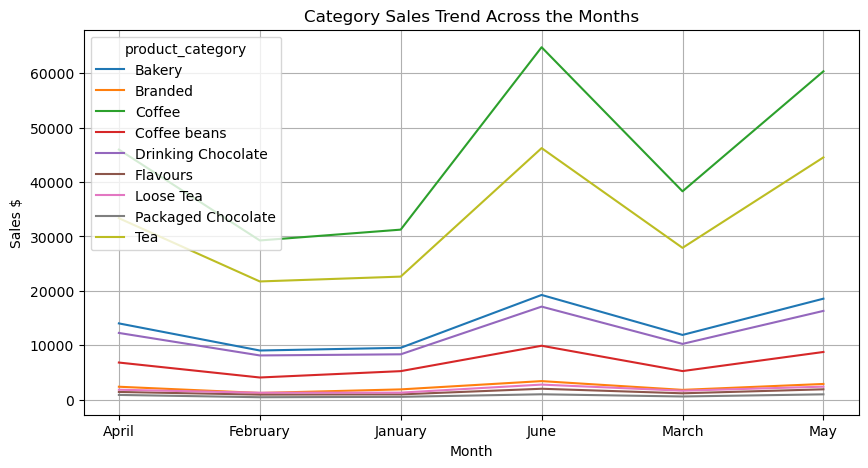

In [ ]:
# Category Sales Trend Across the Month
category_sale_trend = df_coffee_time_analysis.groupby(['month_name', 'product_category'])['sale'].sum()
category_sale_trend.unstack().plot(kind='line', 
                                   figsize=(10, 5), 
                                   grid=True, 
                                   title='Category Sales Trend Across the Months',
                                   xlabel="Month", ylabel="Sales $"
                                   )
plt.show()

And this conclude the end of our analysis